<h1>Logistic Regression Training Mean Square Error</h1> 

<h2>Preparation</h2>

In [1]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [2]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1 * (w2 * self.x + b2))))) ** 2)
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label = 'sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg = True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label = 'epoch ' + str(epoch))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [3]:
# Set random seed

torch.manual_seed(0)

<h2 id="Makeup_Data">Get Some Data</h2>

In [5]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get items
    def __len__(self):
        return self.len

In [6]:
# Create Data object

data_set = Data()


<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>

In [7]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Construstor
    def __init__(self,n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction    
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [8]:
# Create model object and print parameter

model = logistic_regression(1)
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-0.0075]])), ('linear.bias', tensor([0.5364]))])


<Figure size 432x288 with 0 Axes>

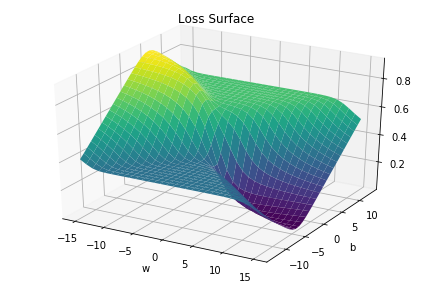

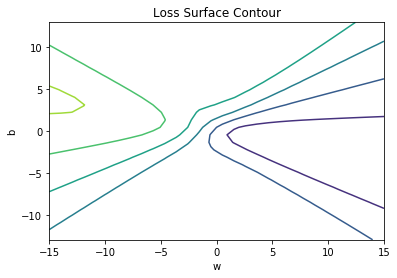

In [9]:
# Create plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [10]:
# Create DataLoader, Cost Function, Optimizer

trainloader = DataLoader(dataset = data_set, batch_size = 3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

<h2 id="BGD">Train the Model via Batch Gradient Descent</h2>

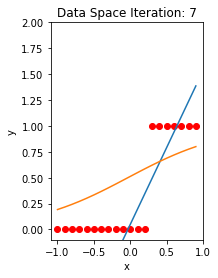

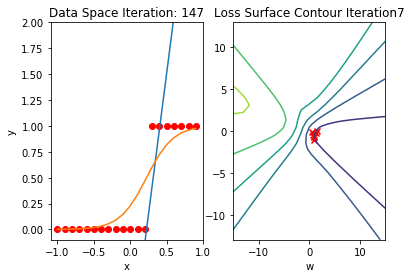

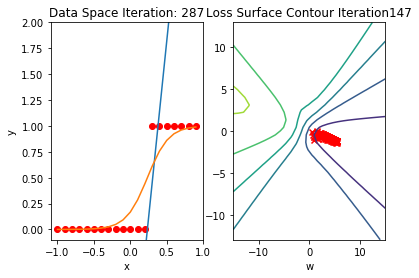

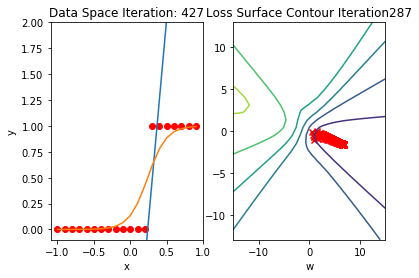

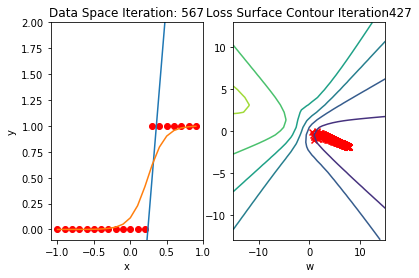

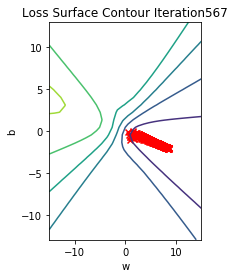

In [11]:
# Train the model

def train_model(epochs):
    for epoch in range(epochs):  
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()

train_model(100)

In [13]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print(yhat)
# it means check to see the filter is correct it means for yhat > 0.5
# label is true and else is false. It checks that on actual data to 
# make sure if actual numbers corresponding to yhat follows the rule
# all zero for yhat <=0.5 and all 1 for yhat >0
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

tensor([[1.0844e-05],
        [2.7207e-05],
        [6.8260e-05],
        [1.7125e-04],
        [4.2954e-04],
        [1.0770e-03],
        [2.6979e-03],
        [6.7415e-03],
        [1.6744e-02],
        [4.0975e-02],
        [9.6820e-02],
        [2.1195e-01],
        [4.0292e-01],
        [6.2868e-01],
        [8.0945e-01],
        [9.1422e-01],
        [9.6395e-01],
        [9.8531e-01],
        [9.9409e-01],
        [9.9764e-01]], grad_fn=<SigmoidBackward>)
The accuracy:  tensor(1.)


the following line provides the output of the logistic function, the values range from 0 to 1

yhat = model(data_set.x)

this line returns a zero if the corresponding value yhat is less than 0.5 and 1 if it's larger then 0.5 and stores it in the tensor label

label = yhat > 0.5

for example yhat=[0.1, 0.51,0.7.0.4] the value for lable =[0, 1,1,0 ].

this line compares the predicted value with the actual value and returns a one if they are the same and a zero otherwise

label == data_set.y.type(torch.ByteTensor)

this line calculates the accuracy by taking the average, we have to cast it to a float for torch.mean

torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float))